In [ ]:
# Phrase 2 :Exploratory Data Analysis (EDA)
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the CLEANED file we created in Phase 1
file_path = "/content/drive/MyDrive/Custora-RFM-Based Customer Segmentation & Retention Analysis/clean_online_retail.csv"
df = pd.read_csv(file_path, parse_dates=['InvoiceDate'])

In [ ]:
# Quick check that loading worked correctly
print("Shape of data:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of data: (397884, 8)

Data types:
 InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Missing values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# 4. Create TotalPrice (sales amount per row)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print("\nFirst 5 rows after adding TotalPrice:")
print(df.head())


First 5 rows after adding TotalPrice:
   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [ ]:
#Country-wise revenue (top 10 countries)
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 countries by revenue:")
print(country_revenue)


Top 10 countries by revenue:
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64


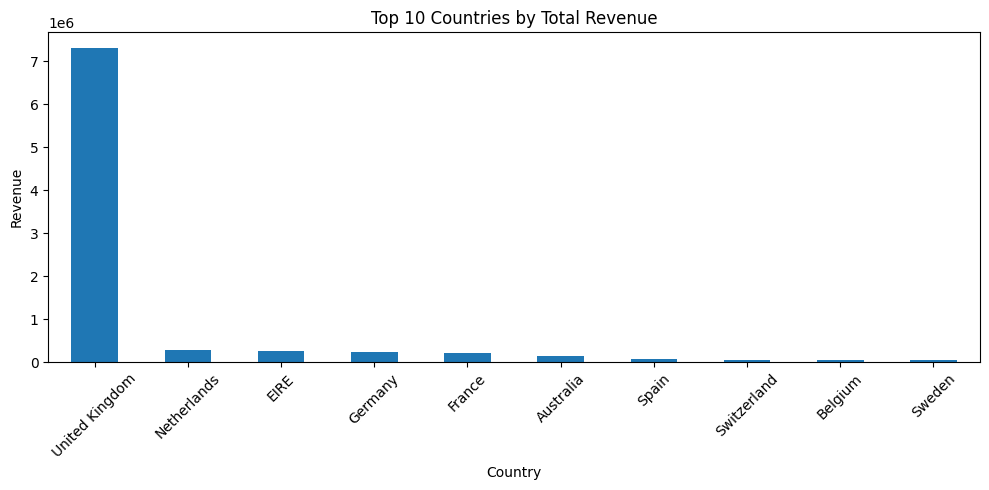

In [ ]:
# Simple bar plot
plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title('Top 10 Countries by Total Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Monthly revenue trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum()

print("\nMonthly revenue:")
print(monthly_revenue)


Monthly revenue:
InvoiceMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: TotalPrice, dtype: float64


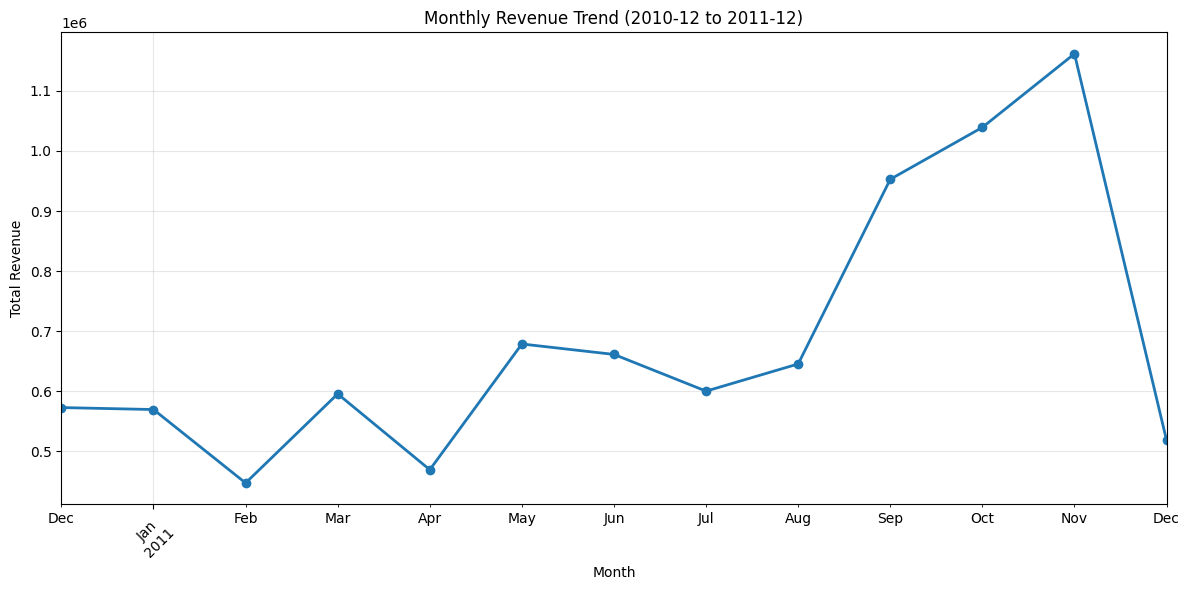

In [ ]:
# Plot monthly trend
plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o', linewidth=2)
plt.title('Monthly Revenue Trend (2010-12 to 2011-12)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Customer concentration (how much do top customers buy?)
customer_total = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

total_revenue = df['TotalPrice'].sum()
top_20_percent_count = int(len(customer_total) * 0.20)
top_20_revenue = customer_total.head(top_20_percent_count).sum()
concentration = (top_20_revenue / total_revenue) * 100

print(f"\nTotal customers: {len(customer_total)}")
print(f"Top 20% customers ({top_20_percent_count} people) contribute: {concentration:.1f}% of revenue")

print("\nTop 10 customers by total spend:")
print(customer_total.head(10))


Total customers: 4338
Top 20% customers (867 people) contribute: 74.6% of revenue

Top 10 customers by total spend:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64



Transaction value statistics:
count     18532.000000
mean        480.865956
std        1678.195579
min           0.380000
25%         158.037500
50%         303.040000
75%         471.840000
max      168469.600000
Name: TotalPrice, dtype: float64


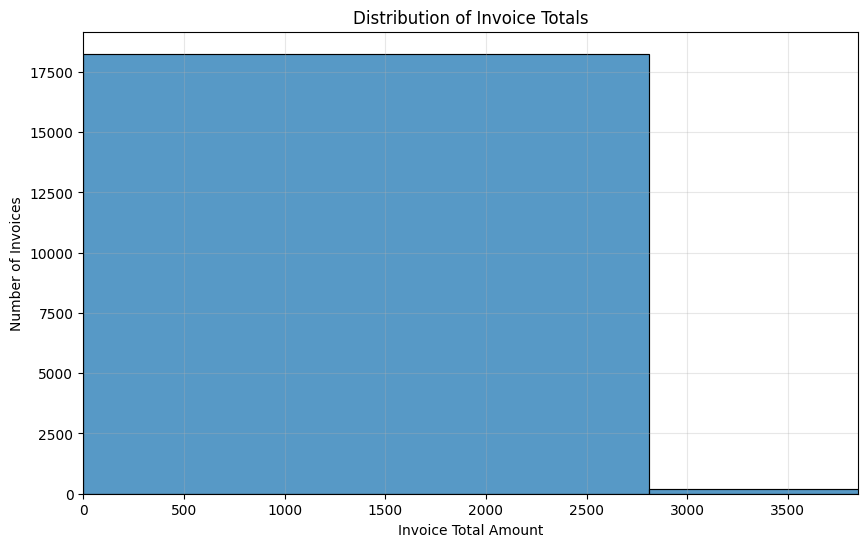


Top 5 most expensive invoices:
InvoiceNo
581483    168469.60
541431     77183.60
556444     38970.00
567423     31698.16
556917     22775.93
Name: TotalPrice, dtype: float64


In [ ]:
# Transaction distribution (how much is each invoice worth?)
invoice_total = df.groupby('InvoiceNo')['TotalPrice'].sum()

print("\nTransaction value statistics:")
print(invoice_total.describe())

# Simple histogram of invoice amounts
plt.figure(figsize=(10,6))
sns.histplot(invoice_total, bins=60, kde=False)
plt.title('Distribution of Invoice Totals')
plt.xlabel('Invoice Total Amount')
plt.ylabel('Number of Invoices')
plt.xlim(0, invoice_total.quantile(0.99))   # zoom in, ignore extreme outliers for view
plt.grid(True, alpha=0.3)
plt.show()

print("\nTop 5 most expensive invoices:")
print(invoice_total.sort_values(ascending=False).head(5))